In [1]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
from subDiff import subdiff2
from kaucherpy_master.src.kaucher.Kaucher import *

In [10]:
def plot_matrix(mtx, filename = None):
    plt.pcolormesh(mtx)
    plt.colorbar()
    if filename is not None:
        plt.savefig(filename)
    plt.show()
    plt.close()
    
def plot_norm_iter(norm_list, filename):
    plt.plot(norm_list)
    plt.xlabel("iter number")
    plt.ylabel('norm')
    plt.savefig('iter_' + filename)
    plt.show()
    plt.close()
    
def plot_solution(mtx_inf, mtx_sup, x_inf, x_sup, inf_b, sup_b, filename = None):
    n = mtx_inf.shape[0]
    mtx_interval = [[Kaucher(mtx_inf[i,j], mtx_sup[i,j]) for j in range(n)] for i in range(n)]
    x_interval = [Kaucher(x_inf[i], x_sup[i]) for i in range(n)]
    b_interval = [sum([mtx_interval[i][j] * x_interval[j] for j in range(n)]) for i in range(n)]
    inf_b_sol = np.array([comp.lower for comp in b_interval])
    sup_b_sol = np.array([comp.upper for comp in b_interval])
    plt.plot(inf_b, label='inf(b)')
    plt.plot(sup_b, label='sup(b)')
    
    plt.plot(inf_b_sol, label='inf(Ax_sol)', linestyle='--')
    plt.plot(sup_b_sol, label='sup(Ax_sol)', linestyle='--')
    
    mid_Ax = (inf_b_sol + sup_b_sol) / 2
    plt.plot(mid_Ax, label='mid(Ax)')
    plt.legend()
    if filename is not None:
        plt.savefig(filename)
    plt.show()
    plt.close()

In [11]:
def generate_solution_and_b(mtx):
    n = mtx.shape[0]
    x = np.random.uniform(low=1, high=5, size=n)
    b = np.dot(mtx, x)  
    rads = [0.5 for _ in range(n)] 
    b_inf = b - rads 
    b_sup = b + rads
    return b_inf, b_sup, x

def find_matrix(matrix, size):
    M = matrix
    indexes = []
    for i, col in enumerate(M.T):
        if np.fabs(col).sum() > 0:
            indexes.append(i)
    M = M.T[indexes].T
    size = min(M.shape[0], M.shape[1], size)
    k = 0
    while size > 0:
        s = 0
        print(k)
        k += 1
        for i in range(M.shape[0] - size + 1):
            s = 0
            for j in range(M.shape[1] - size + 1):
                s = 0
                if np.linalg.matrix_rank(M[i:i+size, j:j+size]) == size:
                    print(j)
                    break
                s+=1
            if s == 0:
#                 print(i)
                break
        if s == 0:
#             print(size)
            break
        size -=1
    return M[i:i+size, j:j+size]   

In [21]:
def experiment(filename, name):
    m = np.loadtxt(filename)
    m = m[-125:][:106]
    plot_matrix(m, name)
    sub_m = find_matrix(m, max(m.shape))
    plot_matrix(sub_m, 'sub_m_' + name)
    b_low, b_high, sol = generate_solution_and_b(sub_m)
    (x_inf, x_sup), x_seq, cur_iter, norm_list = subdiff2(sub_m, sub_m, b_low, b_high)
    plot_solution(sub_m, sub_m, x_inf, x_sup, b_low, b_high, 'result' + name)
    plot_norm_iter(norm_list, name)
    print('Iter count = ', cur_iter)

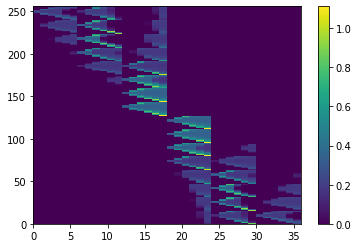

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
22


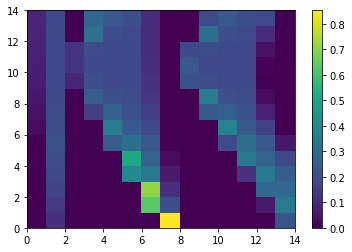

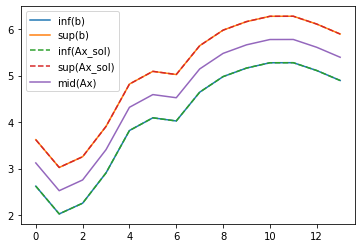

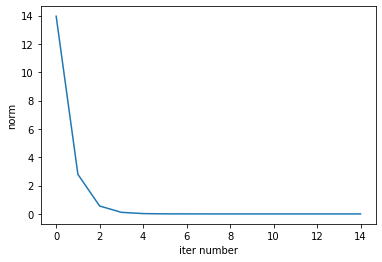

Iter count =  15


In [13]:
experiment('./matrix/matrix_n_phi_1.txt', 'matrix1')

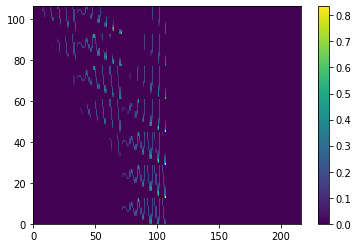

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
59


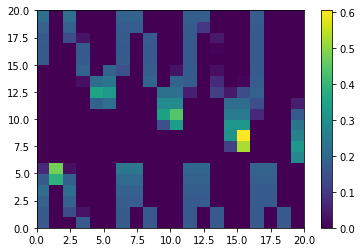

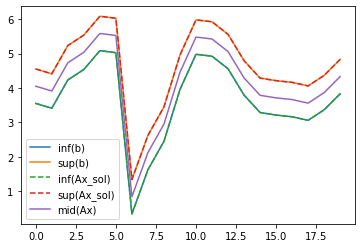

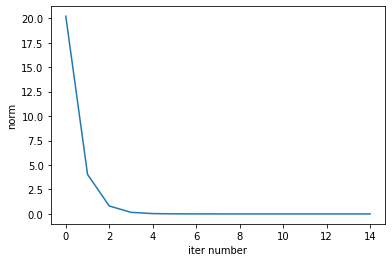

Iter count =  15


In [22]:
experiment('./matrix/matrix_n_phi_6.txt', 'matrix2')

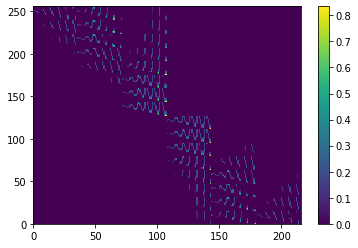

In [23]:
m = np.loadtxt('./matrix/matrix_n_phi_6.txt')
plot_matrix(m, 'matrix2')